In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats

sns.set_style('darkgrid')
pyo.init_notebook_mode()
%matplotlib inline


plt.rc('figure',figsize=(18,11))
sns.set_context('paper',font_scale=2)

In [38]:
[float(i) for i in [1]]

[1.0]

In [39]:
## importing data
per_df = pd.read_csv('Student_performance_data _.csv')
per_df.head(5)

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2            19.83   
1       1002   18       0          0                  1            15.41   
2       1003   15       0          2                  3             4.21   
3       1004   17       1          0                  3            10.03   
4       1005   17       1          0                  2             4.67   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering  GPA  GradeClass  
0             0 2.93        2.00  
1             0 3.04        1.00  
2             0 0.11        4.00  
3             0 2.05        3.00  
4             0 1.29        4.00

In [40]:
per_df.shape

(2392, 15)

In [41]:
per_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [42]:
df = per_df.copy()
df.head(5)

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2            19.83   
1       1002   18       0          0                  1            15.41   
2       1003   15       0          2                  3             4.21   
3       1004   17       1          0                  3            10.03   
4       1005   17       1          0                  2             4.67   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering  GPA  GradeClass  
0             0 2.93        2.00  
1             0 3.04        1.00  
2             0 0.11        4.00  
3             0 2.05        3.00  
4             0 1.29        4.00

# Initial Analysis

In [43]:
# counts of missing values
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

* **No missing values**

In [44]:
# duplicate values 
duplicate_values = sum(df.duplicated())
print('Duplicated observations =', duplicate_values)

Duplicated observations = 0


In [45]:
# taking categorical and numerical columns seperately
cat_df = df[['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']]
num_df = df[['StudyTimeWeekly', 'Absences', 'GPA']]

cat_df.head()

Gender  Ethnicity  ParentalEducation  Tutoring  ParentalSupport  \
0       1          0                  2         1                2   
1       0          0                  1         0                1   
2       0          2                  3         0                2   
3       1          0                  3         0                3   
4       1          0                  2         1                3   

   Extracurricular  Sports  Music  Volunteering  GradeClass  
0                0       0      1             0        2.00  
1                0       0      0             0        1.00  
2                0       0      0             0        4.00  
3                1       0      0             0        3.00  
4                0       0      0             0        4.00

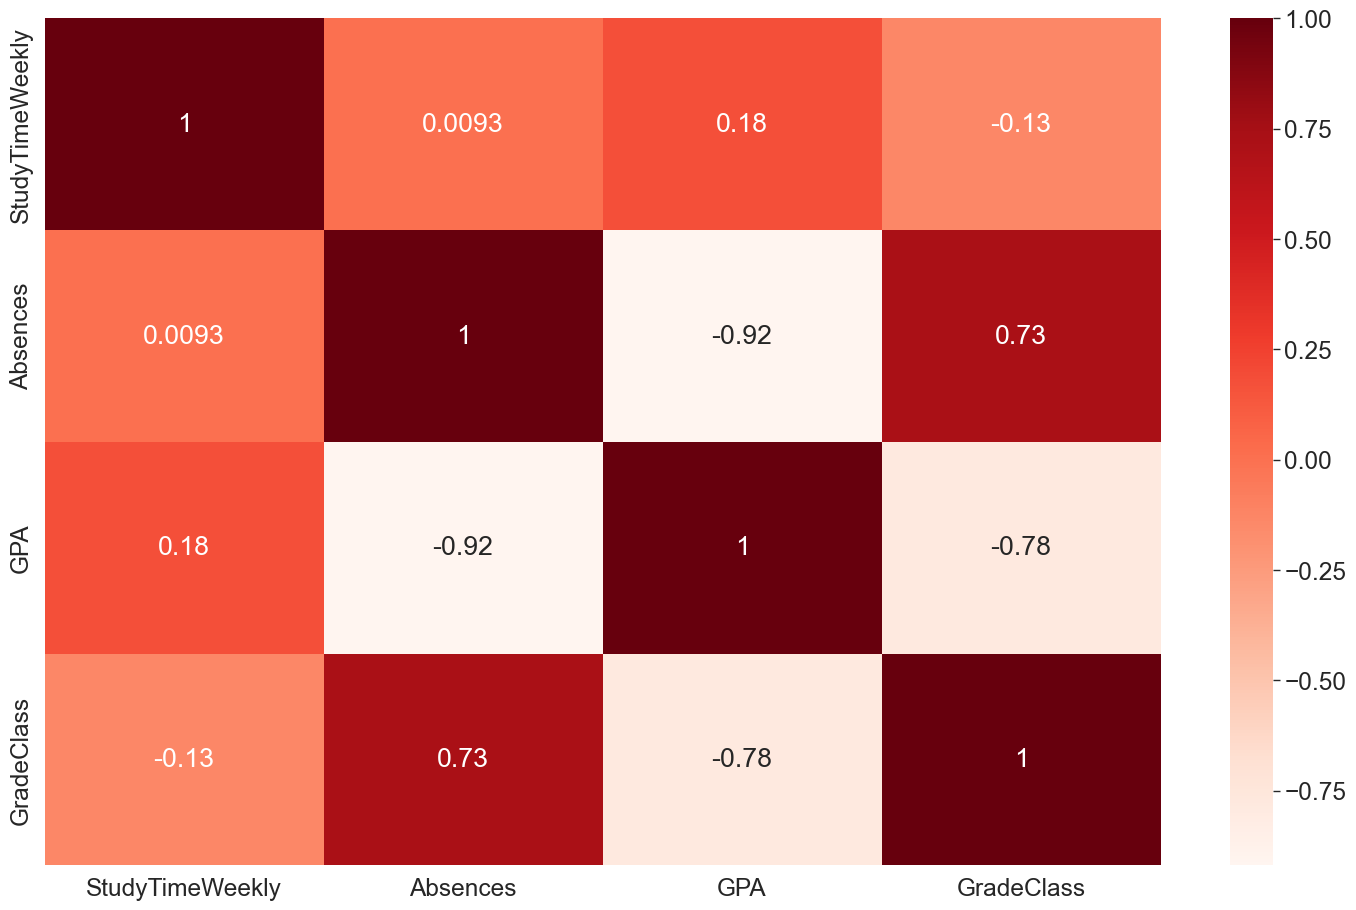

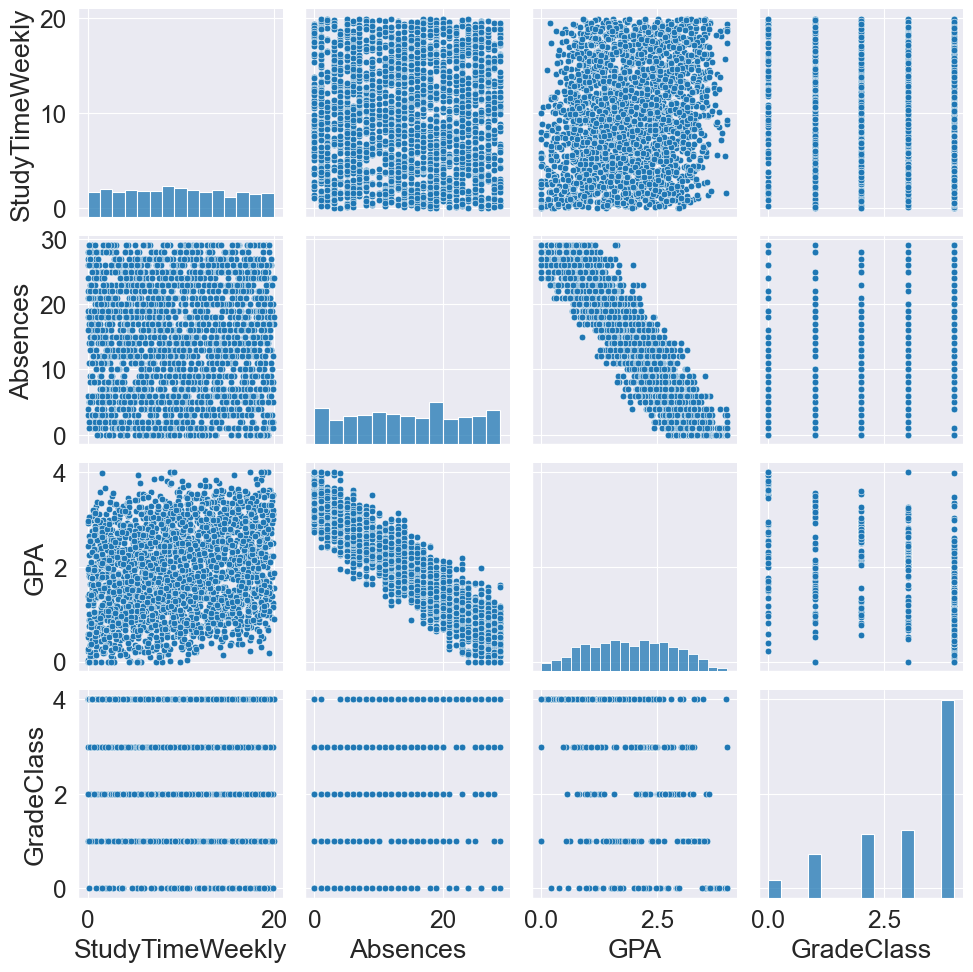

In [46]:
# checking the relationship between predictor variables
sns.heatmap(pd.concat([num_df, cat_df['GradeClass']], axis=1).corr(), annot = True, cmap="Reds")
sns.pairplot(pd.concat([num_df, cat_df['GradeClass']], axis=1))
plt.show()

In [47]:
for col in cat_df.columns:
    print(col)
    for i in cat_df[col].unique():
        print(i,'=', sum(cat_df[col] == i))
    print('\n')    

Gender
1 = 1222
0 = 1170


Ethnicity
0 = 1207
2 = 470
1 = 493
3 = 222


ParentalEducation
2 = 934
1 = 728
3 = 367
4 = 120
0 = 243


Tutoring
1 = 721
0 = 1671


ParentalSupport
2 = 740
1 = 489
3 = 697
4 = 254
0 = 212


Extracurricular
0 = 1475
1 = 917


Sports
0 = 1666
1 = 726


Music
1 = 471
0 = 1921


Volunteering
0 = 2016
1 = 376


GradeClass
2.0 = 391
1.0 = 269
4.0 = 1211
3.0 = 414
0.0 = 107




In [48]:
df =  df.drop(['StudentID'], axis=1)
df.head()

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2            19.83         7   
1   18       0          0                  1            15.41         0   
2   15       0          2                  3             4.21        26   
3   17       1          0                  3            10.03        14   
4   17       1          0                  2             4.67        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      1             0   
1         0                1                0       0      0             0   
2         0                2                0       0      0             0   
3         0                3                1       0      0             0   
4         1                3                0       0      0             0   

   GPA  GradeClass  
0 2.93        2.00  
1 3.04        1.00  
2 0.11        4.00  
3 2.05        3.00  
4 1.29        4.00

In [49]:
# check for missclassfications
grad_lst = []
for i in range(len(df['GPA'])):
    if df['GPA'][i] >= 3.5:
        grad_lst.append(0.0)
    elif df['GPA'][i] < 3.5 and df['GPA'][i] >= 3.0:
        grad_lst.append(1.0)
    elif df['GPA'][i] < 3.0 and df['GPA'][i] >= 2.5:
        grad_lst.append(2.0)
    elif df['GPA'][i] < 2.5 and df['GPA'][i] >= 2.0:
        grad_lst.append(3.0)
    else:
        grad_lst.append(4.0)

In [50]:
df['grad_lst'] = grad_lst
df.head()

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2            19.83         7   
1   18       0          0                  1            15.41         0   
2   15       0          2                  3             4.21        26   
3   17       1          0                  3            10.03        14   
4   17       1          0                  2             4.67        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      1             0   
1         0                1                0       0      0             0   
2         0                2                0       0      0             0   
3         0                3                1       0      0             0   
4         1                3                0       0      0             0   

   GPA  GradeClass  grad_lst  
0 2.93        2.00      2.00  
1 3.04        1.00      1.00  
2 0.11        4.00      4.00  
3 2.05        3.00      3.00  
4 1.29        4.00      4.00

In [51]:
sum(df['GradeClass'] != df['grad_lst'])

168

* **There are 168 missclassifications**

In [52]:
# removing missclassfications
df = df[df['GradeClass'] == df['grad_lst']]
df.head()

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2            19.83         7   
1   18       0          0                  1            15.41         0   
2   15       0          2                  3             4.21        26   
3   17       1          0                  3            10.03        14   
4   17       1          0                  2             4.67        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      1             0   
1         0                1                0       0      0             0   
2         0                2                0       0      0             0   
3         0                3                1       0      0             0   
4         1                3                0       0      0             0   

   GPA  GradeClass  grad_lst  
0 2.93        2.00      2.00  
1 3.04        1.00      1.00  
2 0.11        4.00      4.00  
3 2.05        3.00      3.00  
4 1.29        4.00      4.00

In [53]:
df.shape

(2224, 15)

In [54]:
sum(df['GradeClass'] != df['grad_lst'])

0

# Model building

In [55]:
X = df.drop(['GradeClass', 'grad_lst', 'GPA'], axis=1)
y=df['GradeClass']

# train set test set split before missing values imputation
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
y_train.value_counts()

GradeClass
4.00    951
3.00    300
2.00    288
1.00    183
0.00     57
Name: count, dtype: int64

In [57]:
y_test.value_counts()

GradeClass
4.00    238
3.00     75
2.00     72
1.00     46
0.00     14
Name: count, dtype: int64

In [58]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:02<00:00,  7.35it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1779, number of used features: 12
[LightGBM] [Info] Start training from score -3.440755
[LightGBM] [Info] Start training from score -2.274321
[LightGBM] [Info] Start training from score -1.820846
[LightGBM] [Info] Start training from score -1.780024
[LightGBM] [Info] Start training from score -0.626293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.53it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.80               0.64    None      0.79   
QuadraticDiscriminantAnalysis      0.78               0.63    None      0.78   
LGBMClassifier                     0.76               0.62    None      0.76   
LinearDiscriminantAnalysis         0.78               0.61    None      0.78   
BaggingClassifier                  0.75               0.61    None      0.75   
XGBClassifier                      0.76               0.58    None      0.75   
RandomForestClassifier             0.75               0.58    None      0.75   
AdaBoostClassifier                 0.66               0.57    None      0.66   
DecisionTreeClassifier             0.70               0.56    None      0.70   
NearestCentroid                    0.66               0.56    None      0.68   
ExtraTreesClassifier               0.73 

## SMOTE (Not used)

In [59]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline as pip

# Oversample = SMOTE()
# Undersample = RandomUnderSampler()
# steps = [('o', Oversample)]
# ppl = pip(steps=steps)

# X_train, y_train = ppl.fit_resample(X_train, y_train)

In [60]:
np.sort(list(y_train.value_counts() / len(y_train)))

array([0.03204047, 0.10286678, 0.1618887 , 0.16863406, 0.53456998])

In [61]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, TargetEncoder, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['Age', 'StudyTimeWeekly', 'Absences']
nominal_features = ['Gender', 'Ethnicity', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
ordinal_features = ['ParentalEducation', 'ParentalSupport']

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler(feature_range=(0,1)))
])

#frequency_encoding_transformer = Pipeline(steps=[
#    ('frequency_encoder', FrequencyEncoder(columns=frequency_encode_feature))
#])
#target_encode_transformer = Pipeline(steps=[
#    ('target_encode', TargetEncoder(categories = 'auto', smooth= 'auto', target_type='continuous')),
#    ('scaler', MinMaxScaler())
#])
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')),
    #('scaler', StandardScaler(with_mean=False))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder()),
    ('scaler', MinMaxScaler(feature_range=(0,1)))
])

# Using ColumnTransformer to apply different preprocessing steps to numerical, ordinal, and nominal categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nominal', nominal_transformer, nominal_features),
        ('ordinal', ordinal_transformer, ordinal_features)
    ])

# Define the final pipeline to preprocess the data before fitting the model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:02<00:00,  7.02it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 1779, number of used features: 14
[LightGBM] [Info] Start training from score -3.440755
[LightGBM] [Info] Start training from score -2.274321
[LightGBM] [Info] Start training from score -1.820846
[LightGBM] [Info] Start training from score -1.780024
[LightGBM] [Info] Start training from score -0.626293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.29it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:02<00:00,  7.37it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1779, number of used features: 12
[LightGBM] [Info] Start training from score -3.440755
[LightGBM] [Info] Start training from score -2.274321
[LightGBM] [Info] Start training from score -1.820846
[LightGBM] [Info] Start training from score -1.780024
[LightGBM] [Info] Start training from score -0.626293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.58it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1779, number of used features: 12
[LightGBM] [Info] Start training from score -3.440755
[LightGBM] [Info] Start training from score -2.274321
[LightGBM] [Info] Start training from score -1.820846
[LightGBM] [Info] Start training from score -1.780024
[LightGBM] [Info] Start training from score -0.626293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                                                       Model  \
Model                                                          
LogisticRegression                        LogisticRegression   
QuadraticDiscriminantAnalysis  Quadra

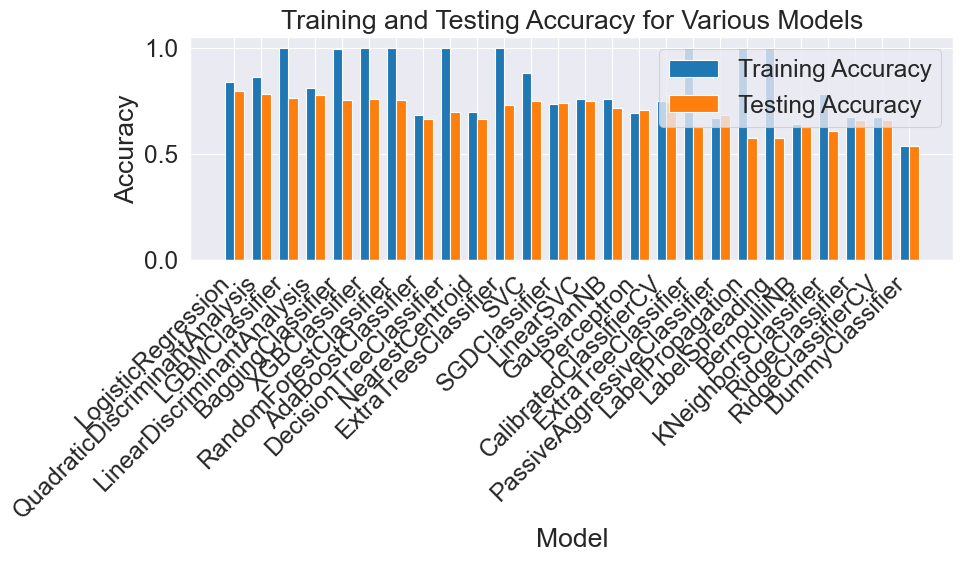

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.80               0.64    None      0.79   
QuadraticDiscriminantAnalysis      0.78               0.63    None      0.78   
LGBMClassifier                     0.76               0.62    None      0.76   
LinearDiscriminantAnalysis         0.78               0.61    None      0.78   
BaggingClassifier                  0.75               0.61    None      0.75   
XGBClassifier                      0.76               0.58    None      0.75   
RandomForestClassifier             0.75               0.58    None      0.75   
AdaBoostClassifier                 0.66               0.57    None      0.66   
DecisionTreeClassifier             0.70               0.56    None      0.70   
NearestCentroid                    0.66               0.56    None      0.68   
ExtraTreesClassifier               0.73 

In [62]:
# Apply preprocessing to training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Apply preprocessing to testing data
X_test_preprocessed = pipeline.transform(X_test)

# Define custom metric function for training accuracy
def training_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=training_accuracy)
models,predictions = clf.fit(X_train_preprocessed, X_test_preprocessed, y_train, y_test)

# Fit models and get predictions
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Initialize an empty dictionary to store training accuracies
training_accuracies = {}

# Loop through each model and calculate training accuracy
for model_name, model_instance in clf.models.items():
    # Fit the model on the training data
    model_instance.fit(X_train, y_train)
    
    # Predict on the training data
    y_train_pred = model_instance.predict(X_train)
    
    # Calculate the training accuracy
    train_accuracy = np.mean(y_train == y_train_pred)
    
    # Store the training accuracy
    training_accuracies[model_name] = train_accuracy

# Create a DataFrame to store both training and testing accuracies
accuracies_df = pd.DataFrame({
    'Model': models.index,
    'Training Accuracy': [training_accuracies[model] for model in models.index],
    'Testing Accuracy': models['Accuracy']
})

print(accuracies_df)

# Plot the accuracies using a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(accuracies_df))

# Plot bars for training accuracy
plt.bar(index, accuracies_df['Training Accuracy'], bar_width, label='Training Accuracy')

# Plot bars for testing accuracy
plt.bar(index + bar_width, accuracies_df['Testing Accuracy'], bar_width, label='Testing Accuracy')

# Labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Various Models')
plt.xticks(index + bar_width / 2, accuracies_df['Model'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

print(models)

# Stacking

In [50]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
rfc = RandomForestClassifier()
bc = BaggingClassifier()
lgbm = LGBMClassifier(verbose=-1)
xgb = XGBClassifier()
etc = ExtraTreesClassifier()
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
ada = AdaBoostClassifier()
svc = SVC()

lr = LogisticRegression(multi_class='multinomial')

clf = {'RandomForest':rfc, 'Bagging':bc, 'LightGB':lgbm, 'XGBoost':xgb, 'ExtraTrees':etc, 'DesicionTree':dtc, 'BernoulliNB':bnb, 'AdaBoost':ada, 'SVC':svc, 'LogisticRegression':lr}
for name,algo in clf.items():
    score = cross_val_score(algo, X_train_preprocessed, y_train, cv = 5, scoring = 'accuracy')
    print("The cv score of {} is:".format(name), score.mean())

The cv score of RandomForest is: 0.9015772870662462
The cv score of Bagging is: 0.8822292323869612
The cv score of LightGB is: 0.8967402733964249
The cv score of XGBoost is: 0.8990536277602523
The cv score of ExtraTrees is: 0.8891692954784437
The cv score of DesicionTree is: 0.8468980021030494
The cv score of BernoulliNB is: 0.38527865404837014
The cv score of AdaBoost is: 0.5838065194532072
The cv score of SVC is: 0.7930599369085174
The cv score of LogisticRegression is: 0.7409043112513144


In [55]:
from itertools import combinations
from sklearn.metrics import accuracy_score 

clf_new = {'RandomForest':rfc, 'LightGB':lgbm, 'XGBoost':xgb, 'ExtraTrees':etc, 'DecisionTree':dtc, 'Bagging':bc}
meta_new = {'LogisticRegression':lr}
meta_models = list(meta_new.values())
base_models = list(clf_new.items())
meta_models.append(lr)

base_combinations = [list(combinations(base_models, i)) for i in range(2, len(base_models) + 1)]
base_combinations = [list(item) for sublist in base_combinations for item in sublist]

In [56]:
best_accuracy = 0
best_stacking_model = None

for base_combination in base_combinations:
    for meta_model in meta_models:
        stack_model = StackingClassifier(estimators=base_combination, final_estimator=meta_model, passthrough=True, n_jobs=-1)
        stack_model.fit(X_train_preprocessed, y_train)
        stacking_predictions = stack_model.predict(X_test_preprocessed)
        #stacking_predictions = model_preds(stack_model)
        #score = cross_val_score(stack_model, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
        accuracy = accuracy_score(y_test, stacking_predictions)
        #accuracy = score.mean()
    
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_stacking_model = stack_model

#print("Best Stacking CV Accuracy:", best_accuracy)
print("Test Accuracy of the Best Stacking Model:", best_accuracy)
print("Best Stacking Model:", best_stacking_model)

Test Accuracy of the Best Stacking Model: 0.7617977528089888
Best Stacking Model: StackingClassifier(estimators=[('RandomForest', RandomForestClassifier()),
                               ('LightGB', LGBMClassifier(verbose=-1)),
                               ('Bagging', BaggingClassifier())],
                   final_estimator=LogisticRegression(multi_class='multinomial'),
                   n_jobs=-1, passthrough=True)


# Hyperparameter tuning using optuna

In [63]:
from sklearn.metrics import classification_report, accuracy_score

import optuna
from optuna.samplers import TPESampler

from scipy.stats import uniform, randint, loguniform
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, make_scorer
#from skopt import BayesSearchCV

## 1) Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

def objective(trial, X_train=X_train, y_train=y_train, p=0.5):
    # Define hyperparameters to tune
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])
    C = trial.suggest_loguniform("C", 1e-4, 1e2)  # Regularization strength
    solver = trial.suggest_categorical("solver", ["saga", "newton-cg", "lbfgs", "sag"])

    # Handle incompatible penalty-solver combinations
    if penalty == "l1" and solver not in ["saga"]:
        return float(0)  # Skip this trial
    if penalty == "elasticnet" and solver != "saga":
        return float(0)  # Skip this trial
    if penalty == "none" and solver in ["saga"]:
        return float(0)  # Skip this trial

    # Handle l1_ratio only when penalty is elasticnet
    l1_ratio = None
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0, 1)
    
    lr = LogisticRegression(penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio, max_iter=200, random_state=42, multi_class='multinomial')

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, stratify=y_train, random_state=42)

    # Apply preprocessing to training data
    X_train_preprocessed = pipeline.fit_transform(X_train)
    
    # Apply preprocessing to validation data
    X_val_preprocessed = pipeline.transform(X_val)

    lr.fit(X_train_preprocessed, y_train)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_val, lr.predict(X_val_preprocessed))

    # Use Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate testing (cross-validation) accuracy
    cv_train_accuracy = cross_val_score(lr, X_train_preprocessed, y_train, n_jobs=-1, cv=skf, scoring='accuracy').mean()
    
    # Calculate the difference between training and testing accuracy
    accuracy_difference = cv_train_accuracy-test_accuracy

    # Calculate validation F1 score difference
    test_f1 = f1_score(y_val, lr.predict(X_val_preprocessed), average=None).max() - f1_score(y_val, lr.predict(X_val_preprocessed), average=None).min()

    # Use Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Apply a penalty if the difference between training and testing F1 scores is too large
    if accuracy_difference > 0.1 and test_f1 > 0.1:
        penalty = abs(accuracy_difference) * abs(test_f1)
        score = cv_train_accuracy - penalty
    else:
        score = cv_train_accuracy  # No penalty if the difference is within tolerance

    return score

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=1)  # Number of trials can be adjusted

# Print the best parameters found
print("Best parameters found: ", study.best_params)

# Train the best model found
best_lr = LogisticRegression(**study.best_params)
best_lr.fit(X_train_preprocessed, y_train)

# Evaluate the best model
y_pred = best_lr.predict(X_test_preprocessed)
print(classification_report(y_true=y_test, y_pred=y_pred))

[I 2024-11-06 21:03:34,638] A new study created in memory with name: no-name-724dcfca-3686-4f93-8406-87a08766310b
[I 2024-11-06 21:03:34,952] Trial 0 finished with value: 0.8257029898690389 and parameters: {'penalty': 'none', 'C': 0.000980454077746322, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8257029898690389.
[I 2024-11-06 21:03:35,023] Trial 1 finished with value: 0.5347862614282185 and parameters: {'penalty': 'l2', 'C': 0.00255713641616257, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8257029898690389.
[I 2024-11-06 21:03:35,373] Trial 2 finished with value: 0.8257029898690389 and parameters: {'penalty': 'none', 'C': 0.140135625081966, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8257029898690389.
[I 2024-11-06 21:03:35,373] Trial 3 finished with value: 0.0 and parameters: {'penalty': 'l1', 'C': 0.03290258970654994, 'solver': 'sag'}. Best is trial 0 with value: 0.8257029898690389.
[I 2024-11-06 21:03:35,447] Trial 4 finished with value: 0.5347862614282185 and 

Best parameters found:  {'penalty': 'none', 'C': 0.0013901628215729192, 'solver': 'sag'}
              precision    recall  f1-score   support

         0.0       0.80      0.57      0.67        14
         1.0       0.67      0.61      0.64        46
         2.0       0.61      0.64      0.63        72
         3.0       0.60      0.64      0.62        75
         4.0       0.94      0.94      0.94       238

    accuracy                           0.80       445
   macro avg       0.72      0.68      0.70       445
weighted avg       0.80      0.80      0.80       445



In [65]:
# training accuracy
y_train_pred = best_lr.predict(X_train_preprocessed)
print(classification_report(y_train, y_train_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.7692    0.5263    0.6250        57
         1.0     0.7157    0.7705    0.7421       183
         2.0     0.7336    0.7361    0.7348       288
         3.0     0.6983    0.6867    0.6924       300
         4.0     0.9468    0.9548    0.9508       951

    accuracy                         0.8415      1779
   macro avg     0.7727    0.7349    0.7490      1779
weighted avg     0.8409    0.8415    0.8404      1779



### Ordinal logistic Regression (considering the ordering)

In [74]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

model = OrderedModel(y_train, X_train_preprocessed, distr='logit') 
ordinal_logit = model.fit(method='bfgs')

print(ordinal_logit.summary())

Optimization terminated successfully.
         Current function value: 0.374032
         Iterations: 78
         Function evaluations: 80
         Gradient evaluations: 80
                             OrderedModel Results                             
Dep. Variable:             GradeClass   Log-Likelihood:                -665.40
Model:                   OrderedModel   AIC:                             1367.
Method:            Maximum Likelihood   BIC:                             1466.
Date:                Wed, 06 Nov 2024                                         
Time:                        22:09:37                                         
No. Observations:                1779                                         
Df Residuals:                    1761                                         
Df Model:                          14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [78]:
y_pred = ordinal_logit.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.50      0.61        14
         1.0       0.62      0.61      0.62        46
         2.0       0.61      0.64      0.63        72
         3.0       0.61      0.64      0.62        75
         4.0       0.94      0.94      0.94       238

    accuracy                           0.79       445
   macro avg       0.71      0.66      0.68       445
weighted avg       0.79      0.79      0.79       445



In [86]:
y_train_pred = ordinal_logit.predict(X_train_preprocessed)
y_train_pred = np.argmax(y_train_pred, axis=1)
print(classification_report(y_pred=y_train_pred, y_true=y_train))

              precision    recall  f1-score   support

         0.0       0.72      0.60      0.65        57
         1.0       0.72      0.74      0.73       183
         2.0       0.74      0.73      0.73       288
         3.0       0.68      0.70      0.69       300
         4.0       0.95      0.95      0.95       951

    accuracy                           0.84      1779
   macro avg       0.76      0.74      0.75      1779
weighted avg       0.84      0.84      0.84      1779



In [81]:
# Get the coefficients
coefficients = ordinal_logit.params.iloc[:X_train_preprocessed.shape[1]]
print("Feature Coefficients:\n", coefficients)

# Get the thresholds (cut points for the ordinal classes)
thresholds = ordinal_logit.params.iloc[X_train_preprocessed.shape[1]:]
print("\nThresholds for each class:\n", thresholds)

Feature Coefficients:
 x1     0.02
x2    -5.30
x3    27.21
x4    -0.32
x5    -0.15
x6    -0.19
x7    -0.16
x8    -2.42
x9    -1.69
x10   -1.82
x11   -1.21
x12    0.27
x13    0.13
x14   -5.57
dtype: float64

Thresholds for each class:
 0.0/1.0   -9.20
1.0/2.0    1.54
2.0/3.0    1.57
3.0/4.0    1.52
dtype: float64


## 2) Catboost

In [44]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = {i: weight for i, weight in enumerate(class_weights)}  # Create a dictionary for CatBoost

def objective(trial, X_train=X_train, y_train=y_train, p=0.5):
    # Suggest values for hyperparameters
    iterations = trial.suggest_int('iterations', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    depth = trial.suggest_int('depth', 3, 10)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10.0)
    bagging_temperature = trial.suggest_uniform('bagging_temperature', 0.0, 1.0)
    border_count = trial.suggest_int('border_count', 32, 255)
    grow_policy = trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])
    loss_function = trial.suggest_categorical('loss_function', ['MultiClass'])
    
    # Create the CatBoost model with suggested hyperparameters and class weights
    catboost = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        bagging_temperature=bagging_temperature,
        border_count=border_count,
        grow_policy=grow_policy,
        verbose=0,  # Suppress output
        random_seed=42,
        class_weights=weights  # Include computed class weights
    )

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, stratify=y_train, random_state=42)

    # Apply preprocessing to training and validation data
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_val_preprocessed = pipeline.transform(X_val)

    # Fit model
    catboost.fit(X_train_preprocessed, y_train)

    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_val, catboost.predict(X_val_preprocessed))

    # Use Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate testing (cross-validation) accuracy
    cv_train_accuracy = cross_val_score(catboost, X_train_preprocessed, y_train, n_jobs=-1, cv=skf, scoring='accuracy').mean()
    
    # Calculate the difference between training and testing accuracy
    accuracy_difference = cv_train_accuracy-test_accuracy
    
    # Calculate validation F1 score
    test_f1 = f1_score(y_val, lr.predict(X_val_preprocessed), average=None).max() - f1_score(y_val, lr.predict(X_val_preprocessed), average=None).min()

    # Use Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate cross-validation F1 score
    #cv_train_f1 = cross_val_score(
    #    catboost, X_train_preprocessed, y_train, n_jobs=-1, cv=skf,
    #    scoring=make_scorer(min_f1_score)  # Use weighted F1 score
    #).mean()
    
    # Calculate the difference between training and testing F1 scores
    #f1_difference = cv_train_f1 - test_f1
    
    # Apply a penalty if the difference between training and testing F1 scores is too large
    if accuracy_difference > 0.1:
        penalty = abs(accuracy_difference) * abs(test_f1)
        score = cv_train_accuracy - penalty
    else:
        score = cv_train_accuracy  # No penalty if the difference is within tolerance

    return score

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters found
print("Best parameters found: ", study.best_params)

# Train the best model found with computed class weights
best_catboost = CatBoostClassifier(**study.best_params, class_weights=weights)
best_catboost.fit(X_train_preprocessed, y_train)

# Evaluate the best model
y_pred = best_catboost.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

[I 2024-11-06 13:31:13,836] A new study created in memory with name: no-name-0a3e0358-bfb7-40ac-ba4a-03c7d676c777
[I 2024-11-06 13:31:17,701] Trial 0 finished with value: 0.6251348640984854 and parameters: {'iterations': 61, 'learning_rate': 0.005695668006344002, 'depth': 3, 'l2_leaf_reg': 0.00013891793603783742, 'bagging_temperature': 0.24344415347308124, 'border_count': 140, 'grow_policy': 'Lossguide', 'loss_function': 'MultiClass'}. Best is trial 0 with value: 0.6251348640984854.
[I 2024-11-06 13:31:22,440] Trial 1 finished with value: 0.7597323466353136 and parameters: {'iterations': 127, 'learning_rate': 0.006322334882597273, 'depth': 6, 'l2_leaf_reg': 0.33962153885120727, 'bagging_temperature': 0.35098141247068226, 'border_count': 100, 'grow_policy': 'Depthwise', 'loss_function': 'MultiClass'}. Best is trial 1 with value: 0.7597323466353136.
[I 2024-11-06 13:31:52,808] Trial 2 finished with value: 0.8109921156373193 and parameters: {'iterations': 187, 'learning_rate': 0.000236975

KeyboardInterrupt: 

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.36      0.36      0.36        14
         1.0       0.50      0.57      0.53        46
         2.0       0.50      0.49      0.49        72
         3.0       0.49      0.52      0.50        75
         4.0       0.93      0.90      0.92       238

    accuracy                           0.72       445
   macro avg       0.56      0.57      0.56       445
weighted avg       0.73      0.72      0.72       445



## 3) XGBoost

In [ ]:
from xgboost import XGBClassifier

# Define the objective function for Optuna
def objective(trial, X_train=X_train, y_train=y_train):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-4, 10.0)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-4, 10.0)
    
    # Create the XGBoost model with suggested hyperparameters
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        use_label_encoder=False,  # To avoid warnings in newer versions of XGBoost
        eval_metric='logloss',  # Required for classification problems to avoid warnings
        random_state=42
    )

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, stratify=y_train, random_state=42)

    # Apply preprocessing to training and validation data
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_val_preprocessed = pipeline.transform(X_val)

    # Fit model
    xgb.fit(X_train_preprocessed, y_train)

    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_val, xgb.predict(X_val_preprocessed))

    # Use Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate testing (cross-validation) accuracy
    cv_train_accuracy = cross_val_score(xgb, X_train_preprocessed, y_train, n_jobs=-1, cv=skf, scoring='accuracy').mean()
    
    # Calculate the difference between training and testing accuracy
    accuracy_difference = cv_train_accuracy-test_accuracy
    
    # Calculate validation F1 score
    test_f1 = f1_score(y_val, xgb.predict(X_val_preprocessed), average=None).max() - f1_score(y_val, xgb.predict(X_val_preprocessed), average=None).min()

    # Use Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Custom scoring function to return minimum F1 score across classes
    #def min_f1_score(y_true, y_pred):
    #    f1_scores = f1_score(y_true, y_pred, average='weighted')  # Get F1 scores per class
     #   return f1_scores  # Return the minimum F1 score
    
    # Calculate cross-validation F1 score
    #cv_train_f1 = cross_val_score(
    #    catboost, X_train_preprocessed, y_train, n_jobs=-1, cv=skf,
    #    scoring=make_scorer(min_f1_score)  # Use weighted F1 score
    #).mean()
    
    # Calculate the difference between training and testing F1 scores
    #f1_difference = cv_train_f1 - test_f1
    
    # Apply a penalty if the difference between training and testing F1 scores is too large
    if accuracy_difference > 0.1:
        penalty = abs(accuracy_difference) * (1-abs(test_f1))
        score = cv_train_accuracy - penalty
    else:
        score = cv_train_accuracy  # No penalty if the difference is within tolerance

    return score

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters found
print("Best parameters found: ", study.best_params)

# Train the best model found with computed class weights
best_catboost = XGBClassifier(**study.best_params)
best_catboost.fit(X_train_preprocessed, y_train)

# Evaluate the best model
y_pred = best_catboost.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

# Further analyse Logistic Regression model

In [67]:
# Get feature names after one-hot encoding
ohe = pipeline.named_steps['preprocessor'].named_transformers_['nominal']
encoded_feature_names = ohe.get_feature_names_out(['Gender', 'Ethnicity', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering'])
feature_names = ['Age', 'StudyTimeWeekly', 'Absences', 'ParentalEductaion', 'ParentalSupport'] + list(encoded_feature_names)

# Get the coefficients and create a DataFrame
coef_df = pd.DataFrame(best_lr.coef_, columns=feature_names)
coef_df

Age  StudyTimeWeekly  Absences  ParentalEductaion  ParentalSupport  \
0 -0.18             9.58    -49.57               0.37             0.93   
1  0.12             5.11    -25.84               0.36            -0.44   
2  0.09             0.15     -0.25               0.04            -0.34   
3 -0.11            -4.84     24.86              -0.15             0.02   
4  0.08           -10.00     50.80              -0.62            -0.18   

   Gender_1  Ethnicity_1  Ethnicity_2  Ethnicity_3  Tutoring_1  \
0      0.76         0.20         4.57         3.17        3.51   
1     -0.17        -0.21         2.53         1.72        2.02   
2     -0.14         0.37        -0.14         0.17       -0.32   
3     -0.03         0.07        -2.54        -1.75       -1.91   
4     -0.42        -0.43        -4.41        -3.31       -3.30   

   Extracurricular_1  Sports_1  Music_1  Volunteering_1  
0               2.26     -0.27    -0.54           10.28  
1               1.29     -0.20    -0.02            4.99  
2              -0.19     -0.23     0.16            0.02  
3              -1.29     -0.05     0.08           -4.92  
4              -2.07      0.74     0.32          -10.36

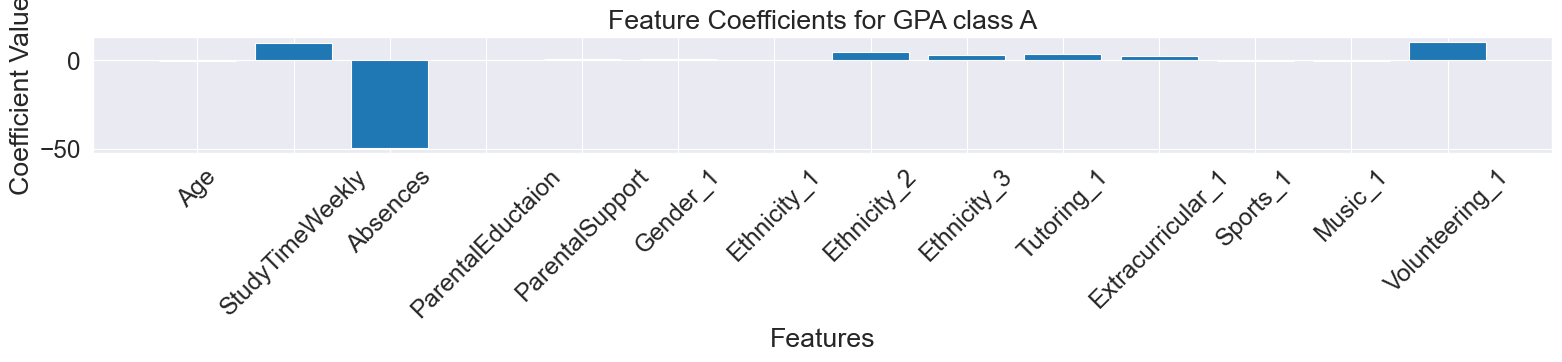

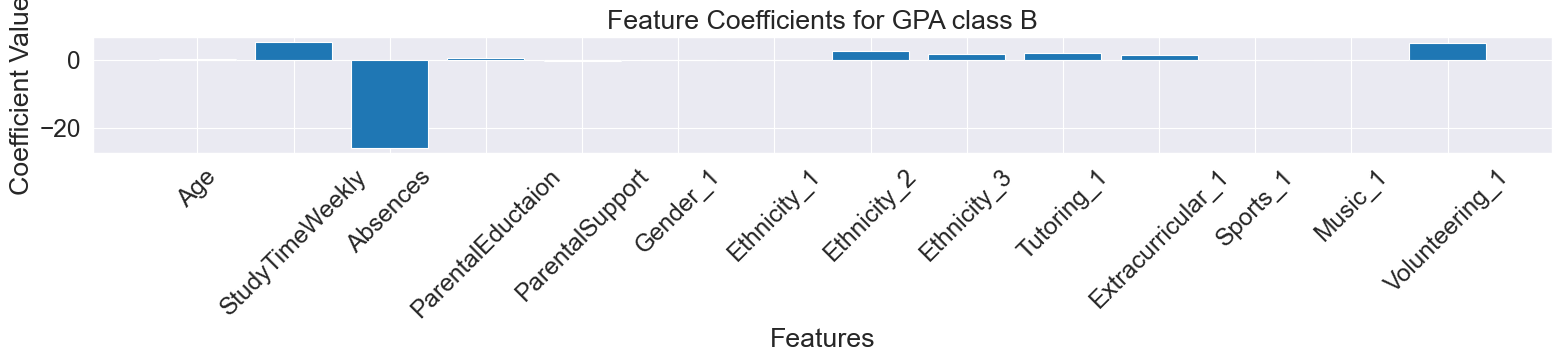

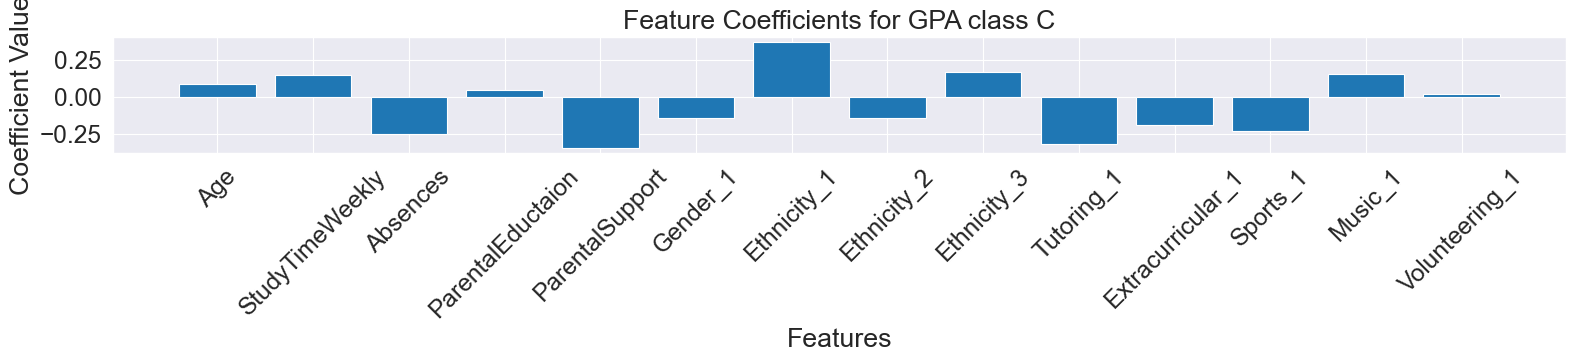

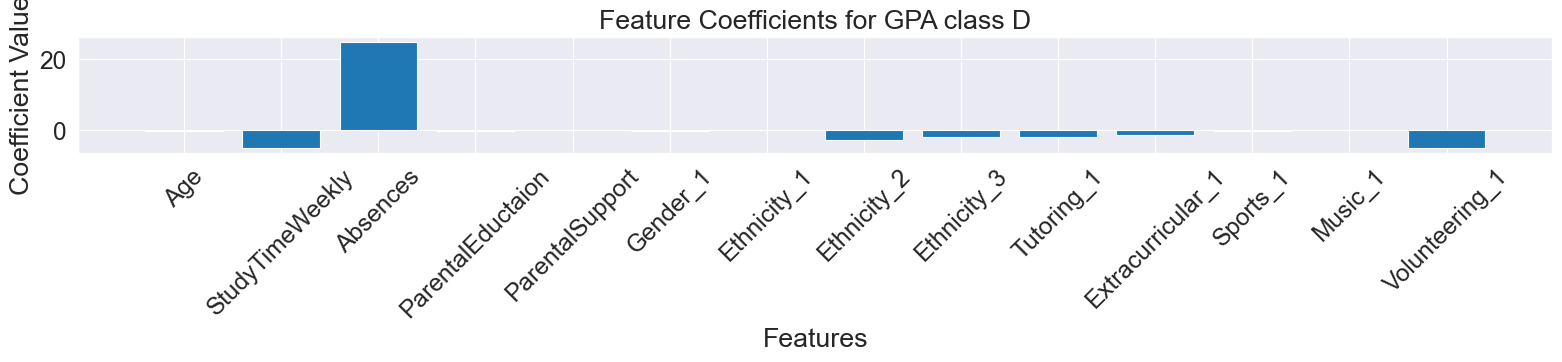

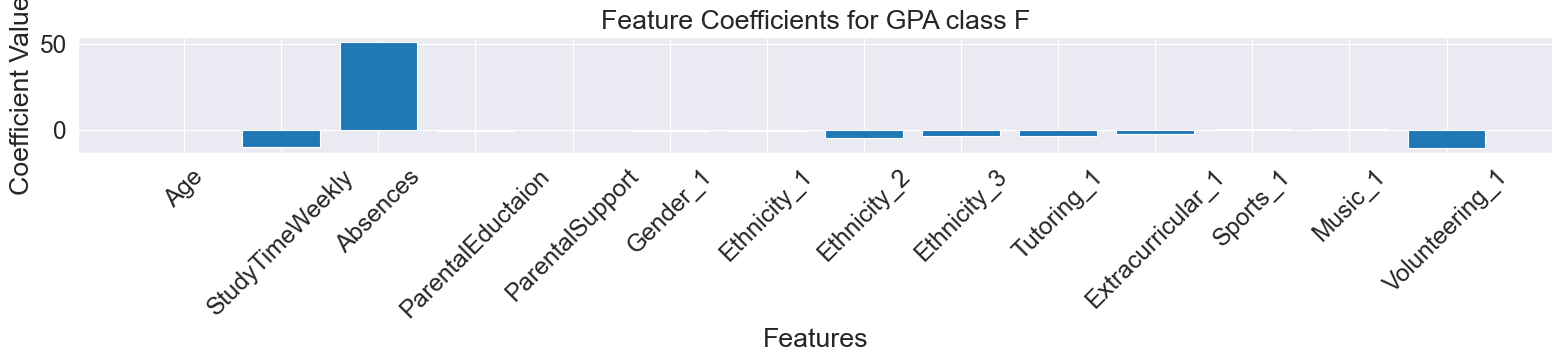

In [71]:
res = ['A', 'B', 'C', 'D', 'F']
# Plot the coefficients for each class
for i, row in coef_df.iterrows():
    plt.figure(figsize=(16, 4))
    plt.bar(row.index, row.values)
    plt.title(f'Feature Coefficients for GPA class {res[i]}')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

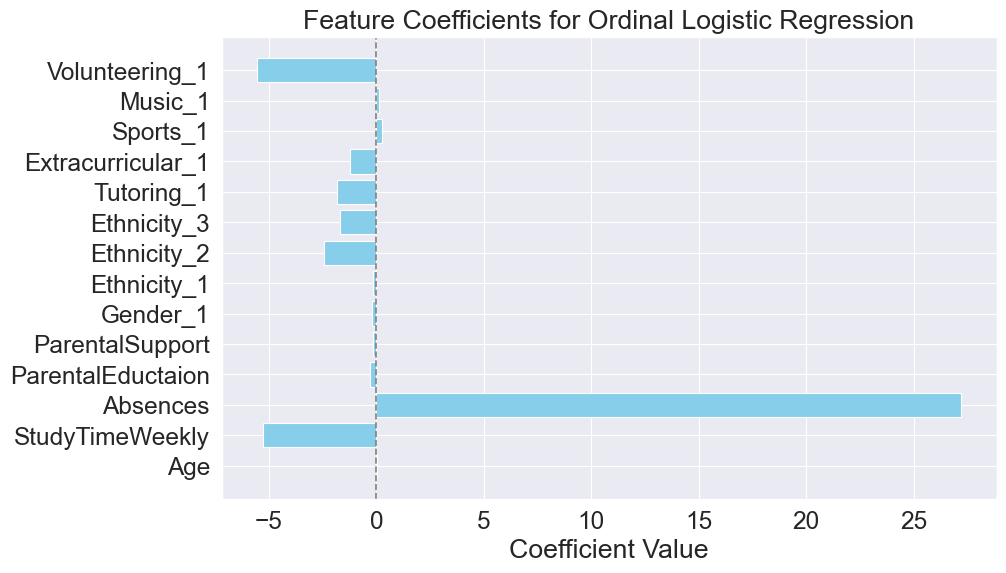

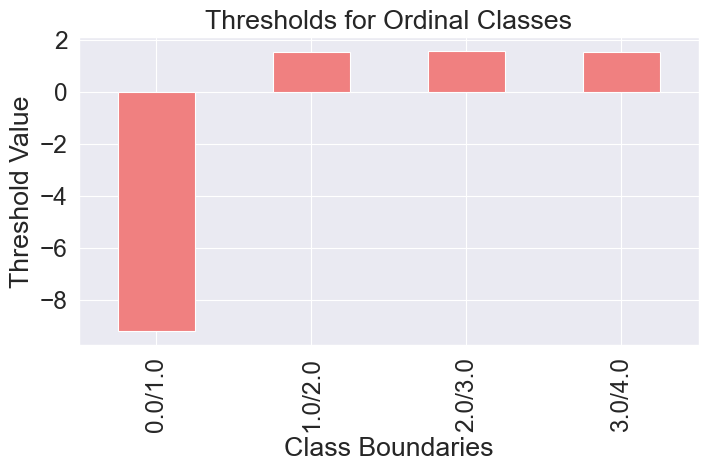

In [83]:
## ordinal logistic regression

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients.values, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Ordinal Logistic Regression')
plt.axvline(0, color='gray', linestyle='--')  # Line for zero effect
plt.show()

# Plot the thresholds
plt.figure(figsize=(8, 4))
thresholds.plot(kind='bar', color='lightcoral')
plt.xlabel('Class Boundaries')
plt.ylabel('Threshold Value')
plt.title('Thresholds for Ordinal Classes')
plt.show()